In [4]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/lib/wsl/lib'

The RASCIL data directory is not available - continuing but any simulations will fail


In [10]:
from karabo.imaging.imager import Imager
from karabo.simulation.telescope import Telescope
from karabo.simulation.observation import Observation, ObservationLong
from karabo.simulation.interferometer import InterferometerSimulation
from karabo.simulation.sky_model import SkyModel
from karabo.sourcedetection.result import SourceDetectionResult, PyBDSFSourceDetectionResult
from karabo.sourcedetection.evaluation import SourceDetectionEvaluation

import matplotlib.pyplot as plt
# Render plots inline
%matplotlib inline

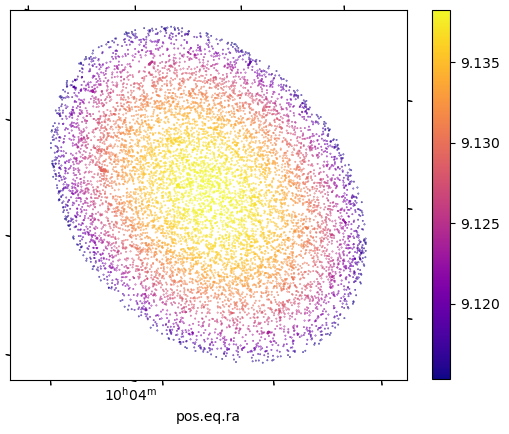

In [44]:
phase_center = [0,-30]
sky = SkyModel.get_MIGHTEE_Sky()
sky.explore_sky(phase_center, s=.1)

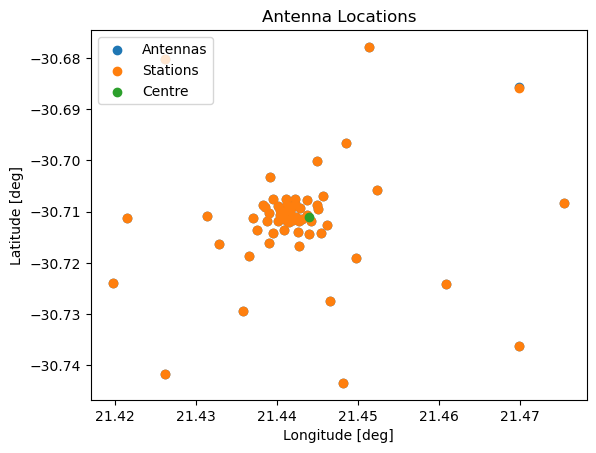

In [53]:
askap_tel = Telescope.get_MEERKAT_Telescope()
askap_tel.plot_telescope()

In [60]:
observation_settings = ObservationLong(
    # length=4 hours
    start_frequency_hz=100e6,
    phase_centre_ra_deg=phase_center[0],
    phase_centre_dec_deg=phase_center[1],
    number_of_channels=100000,
    number_of_time_steps=10, # Integration time?
    number_of_days=2,
)

interferometer_sim = InterferometerSimulation(channel_bandwidth_hz=1e6, vis_path='./data/visibilities.ms')
visibility_askap = interferometer_sim.run_simulation(askap_tel, sky, observation_settings)

use_gpu is None, using is_cuda_available() to set use_gpu to True
Created dirs ./data/visibilities.ms


KaraboError: Too many values in position.txt

In [55]:
imaging_npixel = 2048
imaging_cellsize = 3.878509448876288e-05

In [56]:
imager_askap = Imager(
    visibility_askap,
    imaging_npixel = imaging_npixel,
    imaging_cellsize = imaging_cellsize,
)
dirty = imager_askap.get_dirty_image()
dirty.plot(title='Dirty image')

MemoryError: 